In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle as rc
import pandas as pd
import operator as op
from math import sqrt
from functools import reduce
from random import choice, sample, shuffle
from copy import deepcopy

Задание выполнил студент 154 группы Алиев Магомед.

# Number 1.1

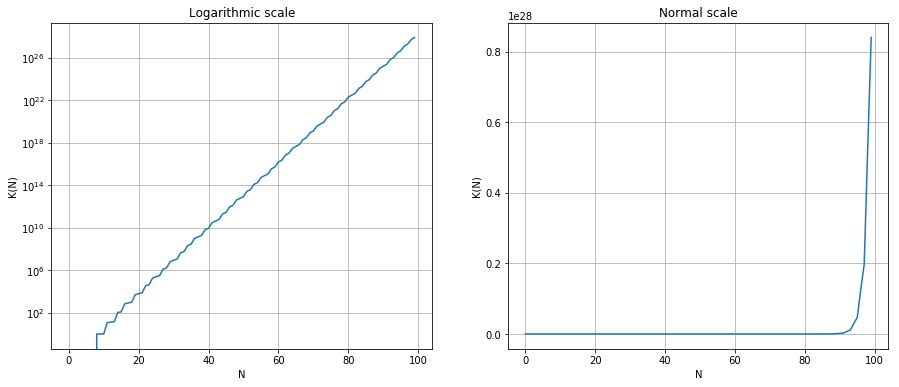

In [2]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer//denom

def K_func(n):
    sum_ = 0
    for i in range(int(n/2 - sqrt(n))):
        sum_ += ncr(n, i)
    return sum_

num = 100

x = [i for i in range(num)]
y = [K_func(i) for i in range(num)]
    
    
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.yscale("log")
plt.title('Logarithmic scale')
plt.plot(x, y)
plt.xlabel('N')
plt.ylabel('K(N)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('Normal scale')
plt.xlabel('N')
plt.ylabel('K(N)')
plt.grid(True)

plt.show()

# Number 2.3.1

**Task**: There are coins of denominations 1, 5, 10, 25, 50 cents and \$1. In how many different ways
can we make up $1 (i.e. 100 cents) from these coins?

In this section, a = {1, 5, 10, 25, 50, 100} is the list of coin denominations.
This classical problem of dynamic programming can be solved by means of a recurrence relation.

$$ f(n) = \begin{cases} 0, & k < 1\ or\ n < 0 \\ 1, & n = 0 \\ f(n, k-1) + f(n - a_k, k) & else \end{cases} $$

Important to note that when changing money “5 penny, 10 penny” and “10 penny, 5 penny” are considered as just one way of making change for 15 cents, so that ordering is not being taken into account.

In usual case, the number of ways of making change using the first k types of coin is the number of ways that don't use that coin $f(n, k - 1)$ plus the number of ways that do $f(n - a_k, k)$. The boundary cases assert that there is exactly one way to make change for 0 cents using a positive number of coins and there are no ways to make change for negative amounts, or using no coins. Thus, the difficulty of finding the number of all the variants of the change will be $O(n*k)$.

In [3]:
df_combinations = pd.DataFrame(columns=["f(n, {})".format(i) for i in range(1, 7)],
                       index=[i for i in range(0, 101, 5)])

a = [1, 5, 10, 25, 50, 100]

def get_value(n, k):
    if k < 1 or n < 0:
        return 0
    elif n == 0:
        return 1
    else:
        return df_combinations.iloc[n][k - 1]

for i in range(1, 7):
    for j in range(0, 101, 5):
        j = int(j / 5)
        df_combinations.iloc[j][i - 1] = get_value(j, i - 1) + get_value(int((j * 5 - a[i - 1])/5), i)


display(df_combinations)

,"f(n, 1)","f(n, 2)","f(n, 3)","f(n, 4)","f(n, 5)","f(n, 6)"
0,1,1,1,1,1,1
5,1,2,2,2,2,2
10,1,3,4,4,4,4
15,1,4,6,6,6,6
20,1,5,9,9,9,9
25,1,6,12,13,13,13
30,1,7,16,18,18,18
35,1,8,20,24,24,24
40,1,9,25,31,31,31
45,1,10,30,39,39,39


And some examples.

In [4]:
a = [1, 5, 10, 25, 50, 100]

all_vars = []

max_ = 100

def inc_(cur_list, cur_sum):
    if cur_sum > max_:
        return None
    elif cur_sum == max_:
        return all_vars.append(cur_list)
    
    last = cur_list[-1]
    for i in a:
        if i < last:
            continue
        inc_(cur_list + [i], cur_sum + i)

# use this function to get list of all variants of changes
def get_change(n):
    global max_
    global all_vars
    max_ = n
    start = [0]
    inc_(start, 0)
    tmp = deepcopy(all_vars)
    all_vars = []
    return tmp

In [5]:
changes = get_change(20)
print ('Number of combinations - {}'.format(len(changes)))

for i in changes:
    for j in i[1:]:
        print (j, end=' ')
    print ('\n')

Number of combinations - 9
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 

1 1 1 1 1 1 1 1 1 1 5 5 

1 1 1 1 1 1 1 1 1 1 10 

1 1 1 1 1 5 5 5 

1 1 1 1 1 5 10 

5 5 5 5 

5 5 10 

10 10 



# Number 3.1.2

This task is also easily solved by methods of dynamic programming. Again, all we need is a recurrence relation. Lets number all figures starting with 1:
 - 1 - our rectangle -> (3*2) size
 - 2 + 6 = 1 -> (3*2) 
 - 3 + 4 -> (3*3)
 - 3 + 6 + 6 = 1 -> (3*2)
 - 4 + 6 = 1 - > (3*2)
 - 5 = (3*1)
 - 6 + 6 + 6 = 5 -> (3*1)
 
Thus we have 4 figures of size (3, 2), 2 figures of size (3, 1) and 1 figure of size (3, 3). It means the number of ways of filling rectangular of length N is the number of fillings of N-2 multiplied by 4 plus the number of fillings of N-1 multiplied by 2 plus the number of fillings of N-3. So, our recurrence relation looks like:
$$ F_n = 4*F_{n-2} + 2*F_{n-1} + F_{n-3} $$
The first three elements could be calculated manually:
$$ F(0) = 1, F(1) = 2, F(2) = 8 $$
Sure, $F(0)$ should be 0, but 1 is needed to correctly calculate F(3).

In [6]:
# define first three elements
F = [1, 2, 8]

N = 50

for i in range (3, N):
    F.append(4*F[i-2] + 2*F[i-1] + F[i-3])
    
for i in range(25):
    print ("N_{:<2} - {:<15} N_{} - {}".format(i, F[i], i + 25, F[i + 25]))

N_0  - 1               N_25 - 6591960236402
N_1  - 2               N_26 - 21771765673688
N_2  - 8               N_27 - 71907257257465
N_3  - 25              N_28 - 237493537446084
N_4  - 84              N_29 - 784387869595716
N_5  - 276             N_30 - 2590657146233233
N_6  - 913             N_31 - 8556359308295414
N_7  - 3014            N_32 - 28259735071119476
N_8  - 9956            N_33 - 93335564521653841
N_9  - 32881           N_34 - 308266428636081000
N_10 - 108600          N_35 - 1018134850429896840
N_11 - 358680          N_36 - 3362670979925771521
N_12 - 1184641         N_37 - 11106147790207211402
N_13 - 3912602         N_38 - 36681114350547405728
N_14 - 12922448        N_39 - 121149490841849428585
N_15 - 42679945        N_40 - 400129586876095691484
N_16 - 140962284       N_41 - 1321538251470136503036
N_17 - 465566796       N_42 - 4364744341286505200593
N_18 - 1537662673      N_43 - 14415771275329652104814
N_19 - 5078554814      N_44 - 47612058167275461515036
N_20 - 16773327

We can plot a graph to demonstrate how fast the number of ways increases.

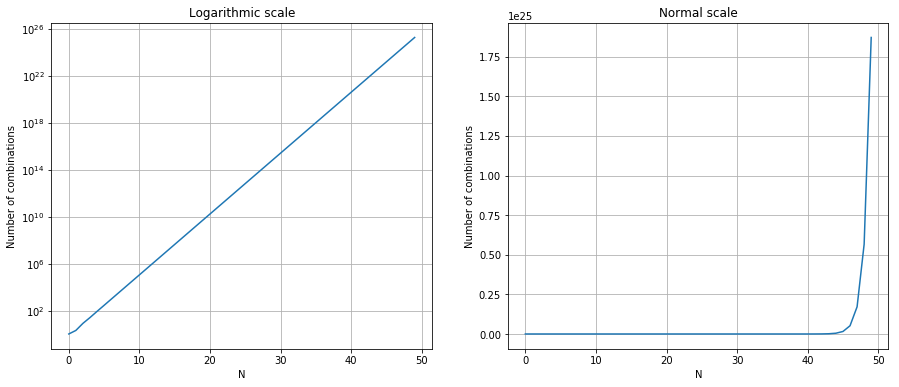

In [7]:
x = [i for i in range(N)]
y = F

fig = plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
plt.yscale("log")
plt.title('Logarithmic scale')
plt.plot(x, y)
plt.xlabel('N')
plt.ylabel('Number of combinations')
plt.grid(True)

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, y)
plt.title('Normal scale')
plt.xlabel('N')
plt.ylabel('Number of combinations')
plt.grid(True)

plt.show()

Now lets add some visualization.

In [8]:
# lets define some rules for every figure

# possible variants for concatination
fig_ = {
        '0' : ['0', '1', '2', '4', '5xx', '555'],
        '1' : ['xx5'],
        '2' : ['3', 'x55'],
        '3' : ['0', '1', '2', '4', '5xx', '555'],
        '4' : ['0', '1', '2', '4', '5xx', '555'],
        '5xx' : ['3'],
        'x55' : ['0', '1', '2', '4', '5xx', '555'],
        'xx5' : ['0', '1', '2', '4', '5xx', '555'],
        '555' : ['0', '1', '2', '4', '5xx', '555']
}

def random_color():
    rgbl=[i for i in range(256)]
    res = sample(rgbl, 3)
    return tuple(res)

colors = {}
for i in fig_.keys():
    colors[i] = '#{:02x}{:02x}{:02x}'.format(*random_color())

fig_patches = {
    '0' : [[(0,0), 2, 3]],
    '1' : [[(0,0), 1, 3], [(1,0), 1, 2]],
    '2' : [[(0,0), 1, 3], [(1,0), 1, 1]],
    '3' : [[(0,1.1), 1, 2], [(1,0.1), 1, 3]],
    '4' : [[(0,0), 1, 3]],
    '5xx' : [[(0,0), 1, 1]],
    'x55' : [[(0,1.1), 1, 1], [(0,2.2), 1, 1]],
    'xx5' : [[(0,2.1), 1, 1]],
    '555' : [[(0,-0.1), 1, 1], [(0,1), 1, 1], [(0,2.1), 1, 1]]
}

delta = {
    '0' : 2.1, '1' : 1.1, '2' : 1.1, '3' : 2.1, '4' : 1.1, '5xx' : 0.1, '555' : 1.1, 'xx5' : 1.1, 'x55' : 1.1
}

lln = {
    '0' : 2, '1' : 2, '2' : 2, '3' : 1, '4' : 1, '5xx' : 1, '555' : 1, 'xx5' : 0, 'x55' : 0
}
end = ['0', '4', '555', 'x55', 'xx5', '3']

begin = [['0'], ['1'], ['2'], ['4'], ['5xx'], ['555']]

goal = 0
all_variants = []

def add_(cur_list, cur_len, all_=False):
    tmp = list(cur_list)
    last = tmp[-1]

    if cur_len == goal and last in end:
        if all_ is not False:
            all_variants.append(tmp)
        return tmp
    elif cur_len > goal:
        return None

    if all_ is not False:
        next_figures = fig_[last]
    else:
        next_figures = sample(fig_[last], len(fig_[last]))

    for figure in next_figures:
        new_comb = add_(tmp + [figure], cur_len + lln[figure], all_)
        if new_comb is not None and all_ is False:
            return new_comb
        
def get_random_comb(n):
    global goal
    goal = n
    rand_begin = choice(begin)
    rect = None
    while rect == None:
        rect = add_(rand_begin, lln[rand_begin[0]])
        
    return rect

def get_all_comb(n):
    global goal
    global all_variants
    goal = n
    for i_begin in begin:
        add_(i_begin, lln[i_begin[0]], all_=True)
        
    tmp = deepcopy(all_variants)
    all_variants = []
    return tmp
    

def draw_plot(coloring, rect):
    fig = plt.figure(figsize=(17, 6))
    ax2 = fig.add_subplot(111)
    ax2.set_xlim([0, len(rect)+5])
    ax2.set_ylim([0, 5])
    rect_len = 0
    for i in rect:
        rect_len += lln[i]
    ax2.set_title('Filling for {}-length rectangle'.format(rect_len))
        
    x, y = 1, 1
    for i in rect:
        patches = fig_patches[i]
        for j in patches:
            if coloring == 'random':
                tmp = rc(*j, facecolor=colors[i])
            else:
                tmp = rc(*j, facecolor=coloring)
                     
            tmp.xy = (tmp.xy[0] + x, tmp.xy[1] + y)
            ax2.add_patch(tmp)
        x += delta[i]    

Number of combinations: 8


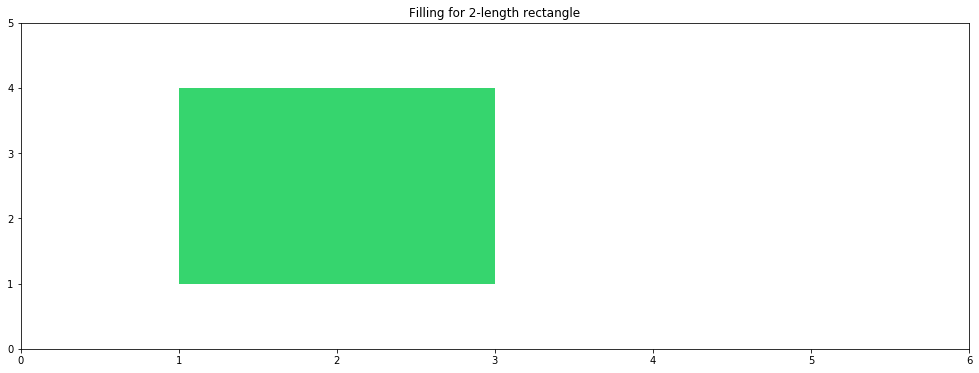

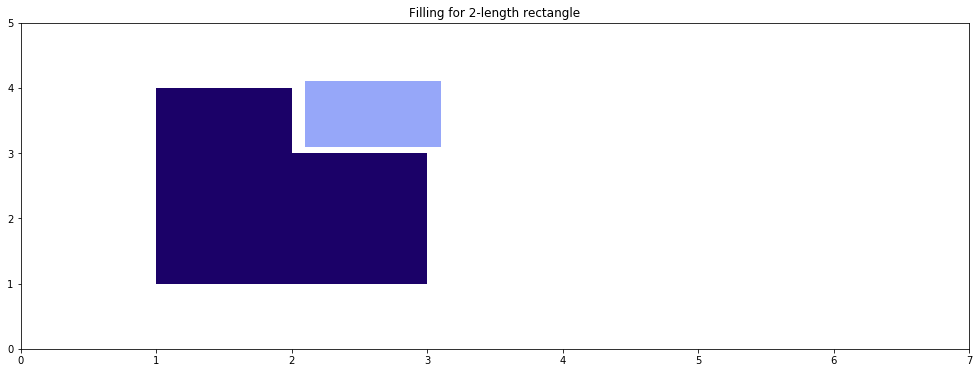

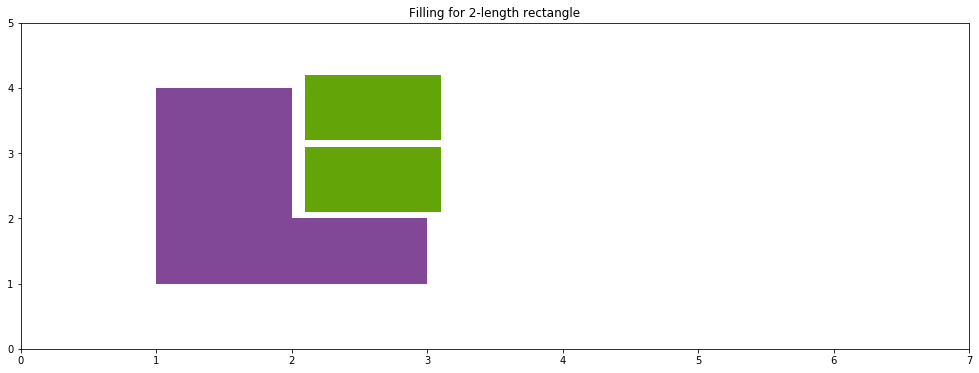

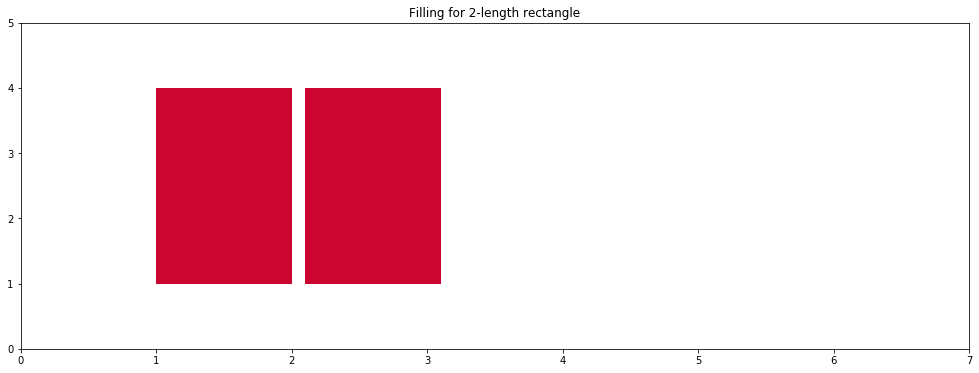

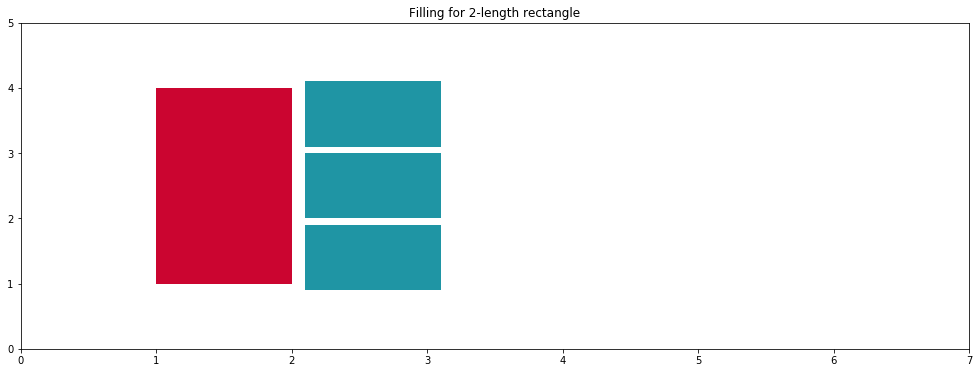

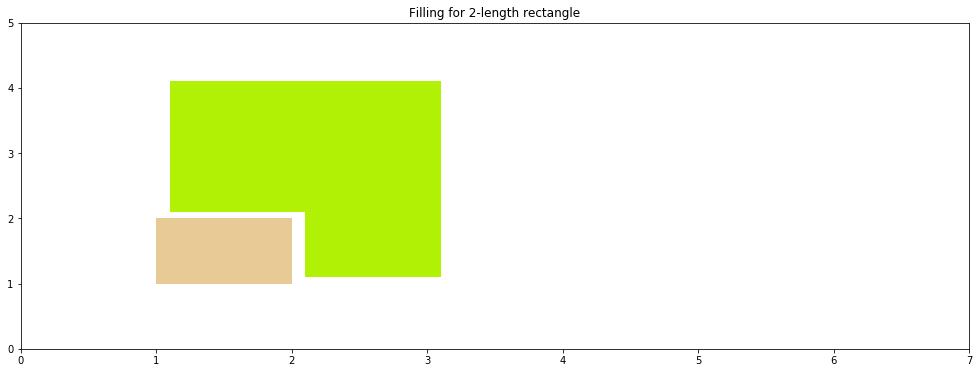

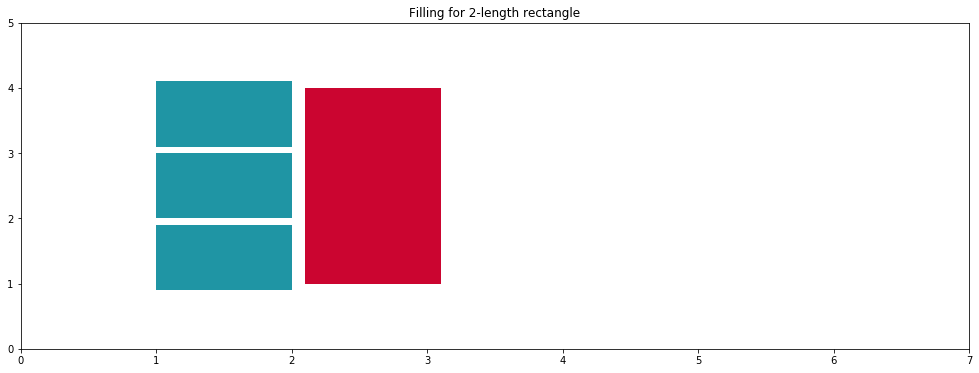

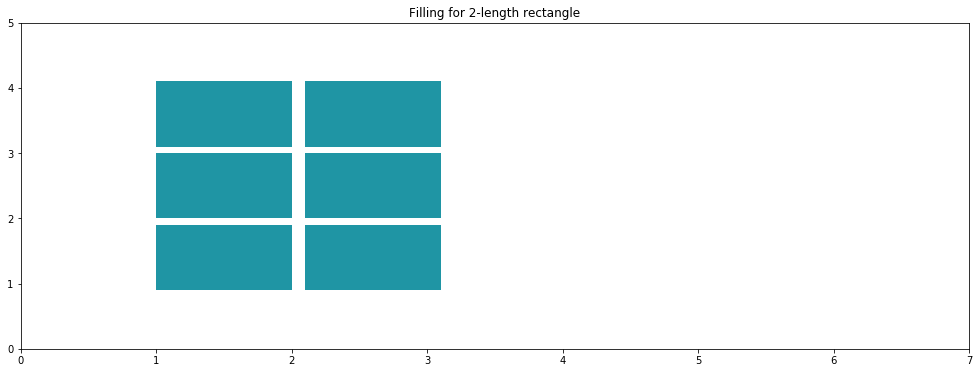

In [9]:
# Use get_all_comb(n) to get all combinations of length n
all_combs = get_all_comb(2)
print ("Number of combinations: {}".format(len(all_combs)))
for var in all_combs:
    # use 'random' for unique color for every primitive or 'blue'/'red' etc. for constant color
    draw_plot(coloring='random', rect=var)
plt.show()

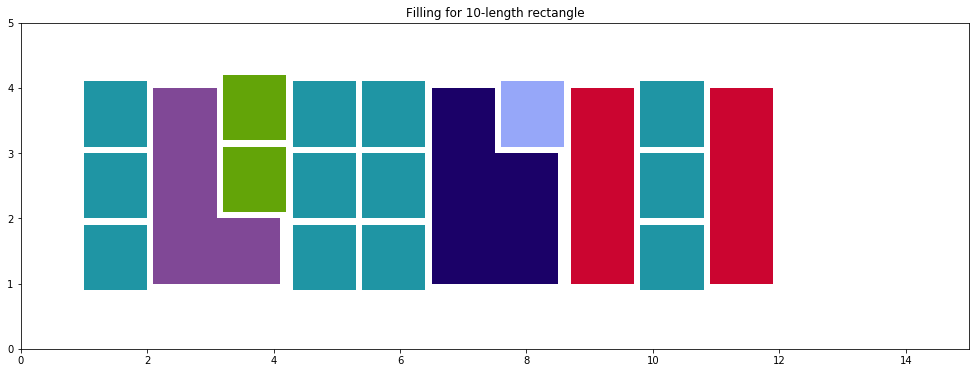

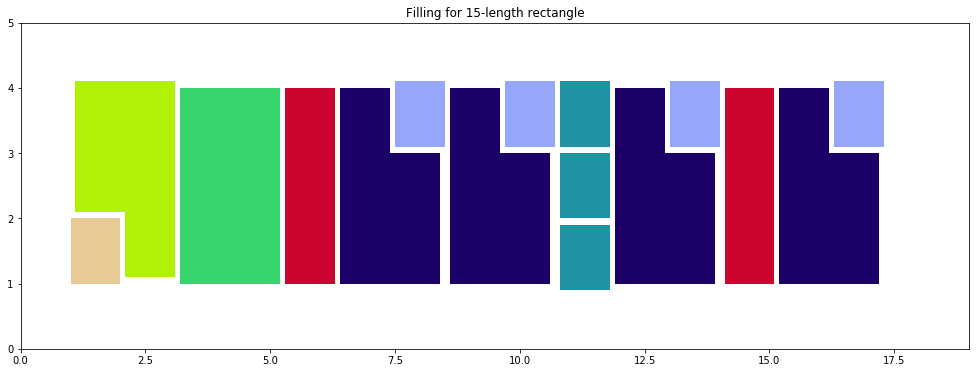

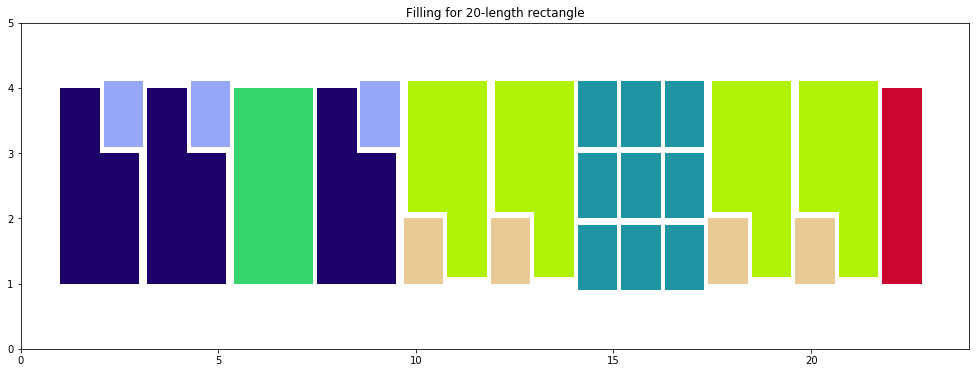

In [12]:
# Use get_random_comb(n) to get random combination of length n
var = get_random_comb(10)
draw_plot(coloring='random', rect=var)
var2 = get_random_comb(15)
draw_plot(coloring='random', rect=var2)
var3 = get_random_comb(20)
draw_plot(coloring='random', rect=var3)
plt.show()